In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter

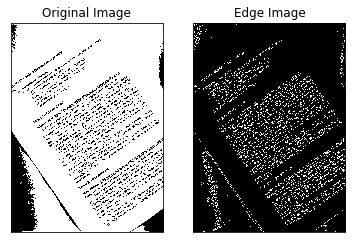

In [7]:
image = cv2.imread(filename='przykladowe_obrazy/strona6.pgm')
img = cv2.Canny(image,50,200)
img = img > 0
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()
height, width = img.shape

In [8]:
thetas_space = np.linspace(0., np.pi, 180)
sinuses = np.sin(thetas_space);
cosinuses = np.cos(thetas_space);

In [9]:
x = (np.arange(height).reshape((-1, 1)) * img)
y = (np.arange(width).reshape((1, -1)) * img)

In [10]:
hough = x * cosinuses[:, None, None] + y * sinuses[:,None, None]
hough = np.rint(hough).astype(int)
max_hough = np.max(hough)
r_space = np.arange(max_hough)
hough_table = np.array([np.histogram(theta_part, bins=r_space)[0][1:] for theta_part in hough ])
blurred = cv2.blur(hough_table.T,(3,3))

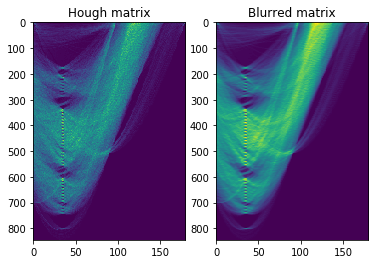

In [11]:

plt.subplot(121),plt.imshow(hough_table.T)
plt.title('Hough matrix')
plt.axis('auto')
plt.subplot(122),plt.imshow(blurred)
plt.axis('auto')
plt.title('Blurred matrix')
plt.show()


In [12]:
index = hough_table.T.max(0).argmax()
r = hough_table[index].argmax()
angle = thetas_space[index]
print('angle',(angle / np.pi) * 180 )

angle 34.1899441341


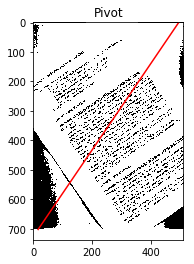

In [13]:
x_offset = width / 2
y_offset = height / 2

cos = np.cos(angle)
sin = np.sin(angle)
a= - cos/(sin + 1e-16)
b = y_offset - a * x_offset

xs = np.array([0, -b/a, (height-b)/a ,width])
ys =  np.array([b, 0,  height, a*width+b])

mask = (xs <= width) * (xs >= 0) * (ys >= 0) * (ys <= height)
plt.imshow(image)
plt.plot(xs[mask], ys[mask], 'r-')
plt.title('Pivot')
plt.show()

In [14]:
angle = thetas_space[index] - np.pi/2
rotate_matrix = np.array([[np.cos(angle), -np.sin(angle )],[np.sin(angle ), np.cos(angle )]])
rotated = np.zeros(( height , width, 3 ), dtype='uint8')
offset_matrix = [[x_offset],[y_offset]]
for x in range(width):
    for y in range(height):
        [a], [b] = (rotate_matrix.dot([[x - x_offset],[y - y_offset]]) + offset_matrix).astype(int)
        if(a > 0 and a < width and b > 0 and b < height):
            rotated[b,a,:] = image[y, x, :]
            
rotated = rotated.astype('uint8')
blurred_rotated = cv2.blur(rotated,(5,5))

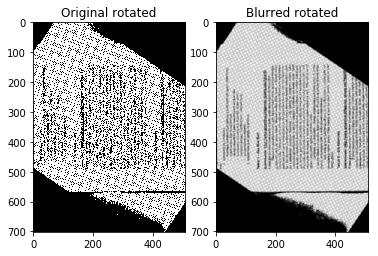

In [15]:
plt.subplot(121),plt.imshow(rotated)
plt.title('Original rotated')
plt.subplot(122),plt.imshow(blurred_rotated)
plt.title('Blurred rotated')
plt.show()